In [1]:
import numpy as np
import keras
from livelossplot import PlotLossesKeras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam, SGD

/home/yg/.local/share/virtualenvs/Application-Traffic-Identification-8Rjd059g/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# 导入数据
X = np.load('X.npy')
y = np.load('y.npy')

# 划分训练集和测试集
index=np.arange(10000)
np.random.shuffle(index)
X_train = X[index[:9000]]
y_train = y[index[:9000]]
X_test = X[index[9000:]]
y_test = y[index[9000:]]

# 数据预处理
X_train = X_train.reshape(-1, 1, 230, 90)
y_train = np_utils.to_categorical(y_train, num_classes=5)
X_test = X_test.reshape(-1, 1, 230, 90)
y_test = np_utils.to_categorical(y_test, num_classes=5)

print(X_train.shape)
print(y_train.shape)

(9000, 1, 230, 90)
(9000, 5)


In [4]:
# Another way to build your CNN
model = Sequential()

# Conv layer 1 output shape (32, 230, 90)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 230, 90),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',     # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 115, 45)
model.add(MaxPooling2D(
    pool_size=4,
    strides=4,
    padding='same',    # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(16, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(4, 4, 'same', data_format='channels_first'))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
# model.add(Dense(8000))
# model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(5))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)
sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)

# We add metrics to get more results you want to see
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

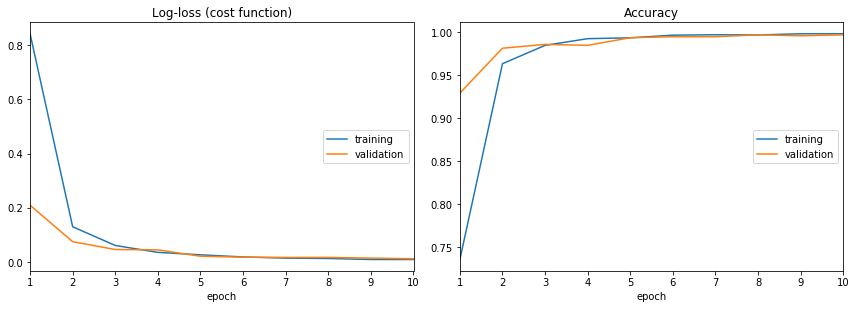

In [6]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, 
          epochs=10, 
          batch_size=100, 
          validation_split=0.1, 
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [7]:
print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)


Testing ------------
1000/1000 [==============================] - 2s 2ms/step

test loss:  0.049970949610695245

test accuracy:  0.993


In [8]:
from keras.models import load_model

# 保存模型及权重
model.save('my_model1.h5')  # creates a HDF5 file 'my_model.h5'

In [9]:
model.save_weights('my_model_weights1.h5')